# Classificação SMS Spam vs Ham

Este projeto trata-se de um modelo básico de **classificação de spam** a partir do dataset *SMS Spam Collection* (Kaggle). O objetivo é entregar um pipeline completo: leitura dos dados, pré-processamento, vetorização, treinamento, avaliação.

---

## Importações

Para a execução do projeto é necessário a instalação e importação das seguintes bibliotecas

In [1]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Download das stopwords
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

## Leitura do dataset

A leitura do arquivo `spam.csv` é realizada no diretório `data/`. As colunas `v1` e `v2` são rotuladas para `label` e `message` facilitando a compreensão, como também alteramos os valores da coluna `label` para `1 (Spam)` e `0 (Ham)`

In [2]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')[['v1', 'v2']]

df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


## 3) Exploração inicial (EDA)

Verificação da distribuição das categorias e outras informações.

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro... 

label
0    4825
1     747
Name: count, dtype: int64 



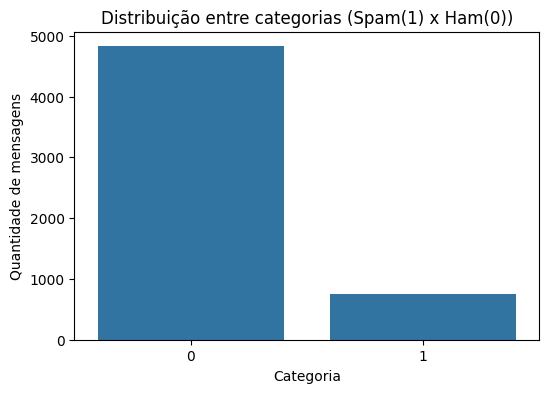

In [3]:
#visualização do dataset
print(df.head(), "\n")

#visualização da quantidade de spam e ham
print(df['label'].value_counts(), "\n")

#plotagem de uma gráfico de proporção entre a categoria spam e ham
count = df['label'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count.index, y=count.values)
plt.title('Distribuição entre categorias (Spam(1) x Ham(0))')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de mensagens')
plt.show()

## Limpeza e pré-processamento de texto

Remoção de pontuação, números e stopwords (inglês), como também a transformação para minúsculas.

In [4]:
stopwordsEng = set(stopwords.words('english'))

def clearText(text):
    text = text.lower() #transforma todas as letras em minusculas
    text = re.sub(r'[^a-z\s]', '', text) #remove qualquer caractere exceto as letras de a-z e espaços
    words = text.split() #quebra as palavras em uma lista de strings
    words = [w for w in words if w not in stopwordsEng] #filtra apenas palavras que não são stopwords
    return ' '.join(words) #une novamente formando uma frase limpa 

df['message'] = df['message'].apply(clearText) 

## Vetorização (TF-IDF) e divisão em treino e teste

Inicialização da vetorização e separação dos conjuntos de treino e teste

In [5]:
#iniciando a vetorização
vectorizer = TfidfVectorizer()

#criação dos conjuntos de treino e teste
predictor = vectorizer.fit_transform(df['message'])
target = df['label']

#criação dos conjuntos de treino e teste
trainingPredictor, testPredictor, trainingTarget, testTarget = train_test_split(predictor, target, test_size=0.3, random_state=42, stratify=target)

## Treinamento do modelo

Inicialização do modelo Naive Bayes e treinamento utilizando os conjuntos de treino

In [6]:
model = MultinomialNB()
model.fit(trainingPredictor, trainingTarget)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Avaliação do modelo

Verificação dos resultados obtidos

Acurácia:  0.9623205741626795

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



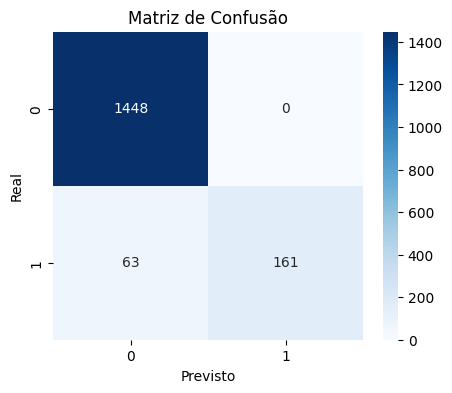

In [7]:
#predição do modelo
predict = model.predict(testPredictor)

#acurácia do modelo e relatorio de classificação, exibindo precisão, recall e f1-score
print('Acurácia: ', accuracy_score(testTarget, predict))
print('\nRelatório de classificação:\n', classification_report(testTarget, predict))

# Matriz de confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(testTarget, predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## Teste básico

Verificando o resultado do modelo com outras mensagens

In [8]:
messages = ["Congratulations! You've won a free iPhone! Click here to claim.",
            "Hey, are we still meeting tomorrow?",
            "Urgent! Your account has been compromised. Verify your info now!"
           ]

clearMessages = [clearText(m) for m in messages]
messagesVectoring = vectorizer.transform(clearMessages)
predicts = model.predict(messagesVectoring)

print('Spam = 1 e Ham = 0\n')

for msg, pred in zip(messages, predicts):
    print('Mensagem: ', msg)
    print('Predição: ', pred)
    print('---')

Spam = 1 e Ham = 0

Mensagem:  Congratulations! You've won a free iPhone! Click here to claim.
Predição:  1
---
Mensagem:  Hey, are we still meeting tomorrow?
Predição:  0
---
Mensagem:  Urgent! Your account has been compromised. Verify your info now!
Predição:  1
---
